<a href="https://colab.research.google.com/github/Coyote-Schmoyote/face-detection-dlib/blob/main/face_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer vision with dlib library
According to their github page (https://github.com/davisking/dlib), dlib is a "toolkit for making real world machine learning and data analysis applications in C++". The dlib library is created and maintained by Davis King, ans is a popular library used by people in both industry and academia in robotics, embedded devices, computer vision, and other related fields. Originally, all the code in dlib library is written in C++, but it has easy to use Python wrappers.
Dlib library is one of the most popular tools when it comes to a number of computer vision tasks, particularly in face and object detection.
This notebook looks into 4 tasks: 
* Face detection
* Facial landmark detection
* Face recognition
* Object detection

## Runtime CPU, GPU, and TPU
Before we dive into writing code, let‘s get familiar with different runtime types.

**Central Processing Unit (CPU)** is the core processor that exists in all smart devices. It is a general-purpose processor designed with a few powerful cores and a cache memory that allows it to run several types of software simultaneously. The major manufacturers of CPUs are intel, Samsung, Apple, Qualcomm, Hewlett-Packard, IBM, etc.

Use CPU when:
* Prototypes that require flexibility
* Training simple models fast
* Training small models with small batch sizes
* Models with limited input/output (I/O)

**Graphics Processing Unit (GPU)** is a specialized processor that works as an accelerator with the CPU. Unlike CPU, it has thousands of cores that break down complex problems into thousands or even millions of separate tasks and complete them in parallel. GPU is essential to deep learning because of its ability to accelerate large matrix operations and perform mixed-precision matrix calculations in one operation. While GPU can process thousands of tasks simultaneously, they are typically less efficient with neural networks compared to TPU.
The major manufacturers of GPU are Nvidia, Broadcom, and Imagination.

Use GPU when:
* Training models that are difficult to change
* Training models with numerous custom TensorFlow operations
* Training medium or large size models with bigger batch sizes
* Rendering graphical tasks

**Tensor Processing Units (TPU)** are application-specific integrated circuits, designed by Google in 2015, and made publicly available since 2018. TPUs are available as a cloud, are very fast at performing vector and matrix computations, and accelerate neural network machine learning on TensorFlow. 

Use TPU when:
* Training models using mostly matrix computations
* Training models that require weeks or months to complete
* Training huge models with very large batch sizes.

For this task, because we are dealing with image processing, let‘s switch our runtime type to GPU.


# 1. Face Detection
Dlib library provides two functions for face detection:
1. HOG (Histogram of Oriented Gradients) + Linear SVM
> Doesn‘t accept any parameters, and returns a pre-trained HOG + Linear SVM face detector included in the dlib library.
2. MMOD CNN
> Accepts `modelPath` parameter, which is the path to the pre-trained human face detector file.

### OpenCV
OpenCV (open Source Computer Vision Library) is a library that provides programming functions mostly for real-time computer vision problems. It mostly focuses on image processing, video capture, and analysis, including face and object detection. We will use this library to draw the bounding boxes for our detected faces.



## HOG face detection
HOG is an abbreviation of Histogram of Oriented Gradients. At its core, HOG is a feature descriptor that is performed for image processing and computer vision tasks. 
First, we need to load the detector using `dlib.get_frontal_face_detector()` function, which is a pre-trained method.
Alongside with `face detector`, let‘s import two more classes: a `dlib.shape_predictor`, which is a tool that takes an image region and defines the pose of a subject, and a `dlib.face_recognition_model_v1`, which is a tool that maps human faces.

In [36]:
# download the libraries
! pip install opencv-contrib-python
! pip install dlib
! pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self._determine_conflicts(to_install)
 

In [37]:
# import packages
import dlib
import cv2
import matplotlib.pyplot as plt

In [38]:
#check the dlib version
dlib.__version__

'19.18.0'

### Bz2 files
The pre-trained machine learning models in dlib library come archived in `.bz2` files. `.bz2` file is a TAR archive compressed with a Burrows-Wheeler(BZ2) compression algorithm combined with Run-Length Encoding (RLE) for better compression. It is often used to compress software packages on Unix-based operating systems, such as Linux. Compared to `.zip`, `.bz2` contain only one, very efficiently compressed file.


The easiest way to decompress a bz2 file is by running the following code in the command line:
`bzip2 -d filename.bz2`
However, this commandcommand will not preserve the original archive file. To keep both, we need to add the `-k` option:
`bzip2 -dk filename.bz2`


After decompressing `.bz2` files from dlib library, we got 2 `.dat` files: `shape_predictor_5_face_landmarks.dat` and `dlib_face_recognition_resnet_model_v1.dat`. Let‘s save the paths to these files in variables.

In [39]:
# import the models
detector = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor("drive/MyDrive/ml-projects/shape_predictor_5_face_landmarks.dat")
model = dlib.face_recognition_model_v1("drive/MyDrive/ml-projects/dlib_face_recognition_resnet_model_v1.dat")

### Import images
For the purpose of this project, we will use a *5 Celebrity Faces* Kaggle dataset (https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset). The dataset includes 14-20 photos of 5 celebrities: Ben Afflek, Elton John, Jerry Seinfeld, Madonna, and Mindy Kaling.
For this experiment, we will use two images of Jerry Seinfeld. 

In [40]:
#save image paths
img1_path = "/content/drive/MyDrive/ml-projects/5-celeb-faces/train/jerry_seinfeld/1.jpg"
img2_path = "/content/drive/MyDrive/ml-projects/5-celeb-faces/train/jerry_seinfeld/2.jpg"

In [41]:
# use dlib load_rgb_image method to upload the images
img1 = dlib.load_rgb_image(img1_path)
img2 = dlib.load_rgb_image(img2_path)

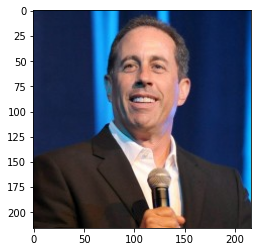

In [42]:
# display images with matplotlib pyplot
plt.imshow(img1);

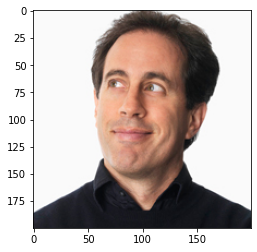

In [43]:
plt.imshow(img2);

### Face detectors
So now that we have imported our tools and our images, leet‘s use the face detection function. 
We have already saved our `dlib.get_frontal_face_detector()` as a variable `detector`. The function takes 2 parameters: image, and an optional upsample parameter. The function returns an array that holds the coordinates of the counding boxes of the detected face. In other words, the output of the `get_frontal_face_detector()` is an array, not an image.


In [44]:
#use dlib detector to detect faces
img1_detected = detector(img1)
img2_detected = detector(img2)

In [45]:
# how many faces detected
len(img1_detected)

1

### Shape_predictor
Shape predictor takes two parameters as an input: an image in a numpy ndarray, and a `dlib.rectangle` object to generate a bounding box. Let‘s see if we have the required data for input. First, let‘s check the datatype of `img1_detected`.

In [46]:
#check the datatype of the output
type(img1_detected)

dlib.rectangles

Great! We have a `dlib.rectangle` object. Now, let‘s see if our image is in the required ndarray format.

In [47]:
type(img1)

numpy.ndarray

Perfect. Now let‘s pass both to the `shape_predictor` function. The function runs the shape predictor on the input image, and returns a single `full_object_detection` - an object that represents the location of an object in an image, together with the positions of each of its parts. In other words, it doesn‘t return the image, but the location of the key points in the face that it detected.

In [48]:
img1_shape = shape_predictor(img1, img1_detected[0])
img2_shape = shape_predictor(img2, img2_detected[0])

In [49]:
type(img1_shape)

dlib.full_object_detection

### Get_face_chip
To actually see our detected face, we will have to use a `dlib.get_face_chip` function, which takes an ndarray of our target image, and a `full_object_detection` which we received as an output from our previous `shape_predictor` function. `get_face_chip` takes an aimage and a `full_object_detection` that references a face in that image, and returns a scaled 150x150 px image as an ndarray, which we then can display using `plt.imshow()`.

In [50]:
#align the face with the shape
img1_aligned = dlib.get_face_chip(img1, img1_shape)
img2_aligned = dlib.get_face_chip(img2, img2_shape)

In [51]:
#check the type
type(img1_aligned)

numpy.ndarray

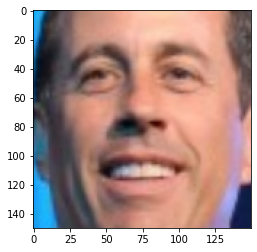

In [52]:
# visualize
plt.imshow(img1_aligned);

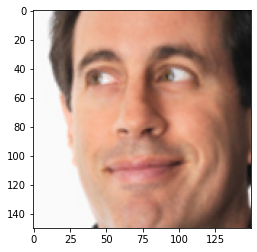

In [53]:
plt.imshow(img2_aligned);

### Creating a bounding box
Now let‘s choose another image and try creating a bounding box aorund the detected face. For the first part of this task, we will follow the same workflow of specifying the image path, converting the image to an ndarray, and passing the image through the HOG detector.

In [54]:
#specify image path
img_path = "/content/drive/MyDrive/ml-projects/5-celeb-faces/train/jerry_seinfeld/3.jpg"

In [55]:
#convert the image to an RGB numpy array
img = dlib.load_rgb_image(img_path)

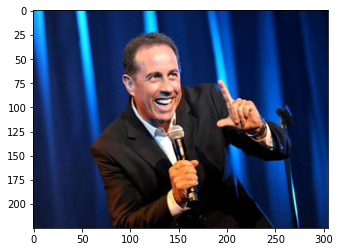

In [56]:
#display the image
plt.imshow(img);

In [57]:
detected_img = detector(img)

Now that we have passed our image through the face detector, instead of cutting out the face, like we did in the previous example, let‘s create a bounding box around it using a `bbox` Python library. 

A **bounding box** is (or bbox) is arectangle that surrounds a detected object, defined by four coordinates: left, top, right, and bottom. (x1, y1) corresponds to the x and y coordinate of the top left corner of the rectangle, and (x2, y2) corresponds to the x and y coordinate of the bottom right corner of the rectangle.

After we have defined the coordinates of our bounding box, we will use an OpenCV function `cv2.rectangle()`, which draws a rectangle on an image. `cv2.rectangle()` accepts 4 parameters:
* Image
* Start_point (x, y)
* End_point (x, y)
* Color of the border in RGB 
 * (255, 0, 0) Red
 * (0, 255, 0) Green
 * (0, 0, 255) Blue
* Width of the border

At the end of the loop, we will display the image with the bounding box around the face using pyplot `imshow()`.

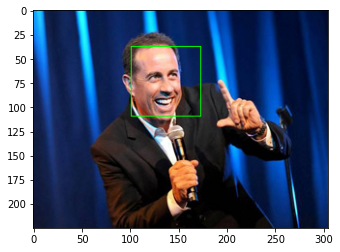

In [58]:
for bbox in detected_img:
  x1 = bbox.left()
  y1 = bbox.top()
  x2 = bbox.right()
  y2 = bbox.bottom()

  cv2.rectangle(img, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0))

  plt.imshow(img)

### Conclusion:
Dlib‘s HOG detector is a widely used face detection model based on SVM and 5 HOG filters (fron tooling, left looking, roight looking, fron tooking rotated left, front looking rotated right). 
### Pros
* It is the fastest method on CPU
* It works exceptionally well for frontal faces
* It is a very light-weight model

### Cons
* Doesn‘t detect faces smaller that 80x80 pixels
* The bounding box doesn‘t fit the whole face
* Doesn‘t work well with non-frontal faces

## MMOD face detection
To address some of the issues of Dlib‘s HOG face detector, we can use a deep neural network-based detector MMOD (Maximum-Margin Object Detector).
To do this, we need to first download the model file form dlib (https://github.com/davisking/dlib-models/blob/master/mmod_human_face_detector.dat.bz2). After we have downloaded the file, we need to decompress it, the same way we decompressed HOG face detector files.

In [59]:
! bzip2 -dk /content/drive/MyDrive/ml-projects/mmod_human_face_detector.dat.bz2

bzip2: Output file /content/drive/MyDrive/ml-projects/mmod_human_face_detector.dat already exists.


To use MMOD face detector, we will need to follow a similar workflow: intiialize the model, upload an image, and specify the coordinates of the bounding box.

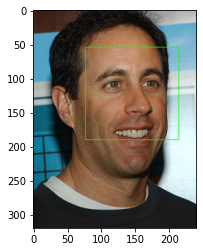

In [60]:
#initialize the detector
mmod_detector = dlib.cnn_face_detection_model_v1("/content/drive/MyDrive/ml-projects/mmod_human_face_detector.dat")

#load the image
img4_path = "/content/drive/MyDrive/ml-projects/5-celeb-faces/train/jerry_seinfeld/5.jpg"
img4 = dlib.load_rgb_image(img4_path)

#process the image through the facedetector
face = mmod_detector(img4, 0)

#establish bbox coordinates
for faceRect in face:
  rect = faceRect.rect
  x1 = rect.left()
  y1 = rect.top()
  x2 = rect.right()
  y2 = rect.bottom()

#draw the bbox with open-cv
  cv2.rectangle(img4, (x1, y1), (x2, y2), (0, 255, 0))

#display the image  
plt.imshow(img4);

### Conclusion
The main **advantages** of a CNN-based face detection is that it is very accurate, can find odd faces, and is easy to use. If we compare it to HOG, after we passed the image through the detector, we didn‘t need to use any addtional functions, such as `face_shape_predictor` or `get_face_chip`, making the whole process much more straightforward.

Some of the main **disadvantages**, however, is that it doens‘t work well on CPU, so we need to switch to GPU, and can be even worse than HOG in detecting small faces. 

For example, if we choose this Jerry Seinfled image

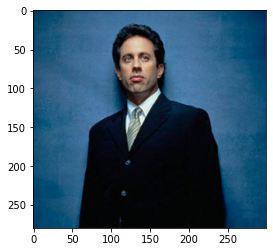

In [61]:
img5_path = "/content/drive/MyDrive/ml-projects/5-celeb-faces/train/jerry_seinfeld/4.jpg"
img5 = dlib.load_rgb_image(img5_path)

plt.imshow(img5);

our MMOD detector won‘t be able to detect it.

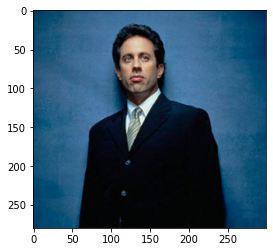

In [62]:
face = mmod_detector(img5, 0)

for faceRect in face:
  rect = faceRect.rect
  x1 = rect.left()
  y1 = rect.top()
  x2 = rect.right()
  y2 = rect.bottom()

  cv2.rectangle(img5, (x1, y1), (x2, y2), (0, 255, 0))

plt.imshow(img5);

# 2. Face landmark detection

Now that we know how to do basic face detection using dlib, let‘s see some of the more advanced methods. One of the most common uses of dlib library is face landmark detection, which allows us to detect key facial features, like eyes, nose, lipsm etc. 

Face landmark detection is used for a variety of tasks, including eye movement tracking, facial expression prediction, controlling  virtual Avatar with face expressions, making virtual makeovers, swapping and morphing faces, and much more. For example, some Snapchat, Instagram, and TikTok filters also use facial landmarks. 

For this, we will use dlib‘s module `shape_predictor_69_face_landmarks.dat` and

In [28]:
!wget -nd https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat

--2022-07-21 06:24:41--  https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat [following]
--2022-07-21 06:24:41--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M   338MB/s    in 0.3s    

2022-07-21 06:24:46 (3

### imutils
We will also need to install `imutils`, a series of convenience functions that make image processing easier. It is useful if we want to use basic image processing functions, such as rotation, resizing, displaying Matplotlib images, detecting images, etc.

We will use the `face_utils` wrapper for face detection algorithms. It provides muliple face utilities, but we will use a function that converts landmark groups to NumPy arrays.

> More information on imutils functions here: https://github.com/PyImageSearch/imutils 

In [29]:
!pip install --upgrade imutils
from imutils import face_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Image Processing
Now, let‘s load our image and pre-process our image.
As we know, most of the images forllow an RGB (red, green, blue) blue format. However, `opencv` library uses a BGR (blue, green, red) format. In other words, it is reversed.
We will use `opencv` to display our image after facial landmark detection, and therefore we need to convert our RGB image to a BGR image. Luckily, `opencv` provides a function `cv2.cvtColor` that does just that: converts RGB to BGR (and the other way round). 

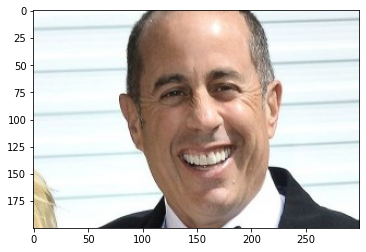

In [30]:
img6_path = "/content/drive/MyDrive/ml-projects/5-celeb-faces/train/jerry_seinfeld/7.jpg"
img6 = dlib.load_rgb_image(img6_path)
img6_bgr = cv2.cvtColor(img6, cv2.COLOR_RGB2BGR)
plt.imshow(img6);

For reference, this is how an inverted image looks like:

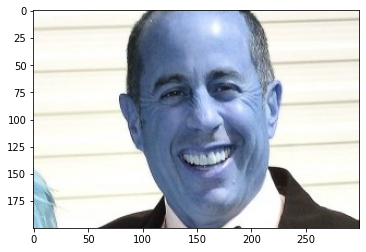

In [31]:
plt.imshow(img6_bgr);

In [32]:
#prepare face detector and landmark predictor
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

#detect a face from our image using a face_detector
faces = face_detector(img6_bgr)

#### Note:
I am creating this notebook using `google.colab`. Unfortunately, using `cv2.imshow()` function makes `google.colab` crash, and therefore we cannot use it in its original `open cv` form. Fortunately, `google.colab` came up with a patch, and made an alternative version for this function, so we can still use it! But first, we need to import it from `google.colab.patches`.

In [33]:
#import cv2_imshow patch
from google.colab.patches import cv2_imshow

### Detect Landmarks
Now we are finally ready to write our function that will detect facial landmarks and display the result image!

* First, we will loop through the images stored in our `faces` variable (right now we only have one image there), and use our `landmark_predictor` which accepts two arguments: the image, and the item of the list. 
* Then, we will use `face_utils` from `imutils` library to convert the landmarks to a NumPy array. If we skip this step, we will get a type error. 
* After the landmarks are detected and converted to an array, we need to actually display them on the image. We will loop through the array of the landmarks.
* As we are looping through the landmarks, we will use `open cv`‘s `cv2.circle()` method. `cv2.circle()` method is used to draw a circle on any image. In our case, we need to draw many tiny circles at the coordinates of the landmarks. The method accepts the following parameters:
 * image
 * center coordinates (x,y)
 * the radius of the circle
 * color in BGR
 * thickness of the circle vorder line. If we put `-1`, it will fill the circle shape by the specified color.
* Finally, after we drew the landmarks on the image, we can display image using `google.colab`‘s patched version of `cv2.imshow()`!

In [34]:
def detect_landmarks(image):
  """
  detects face landmarks and displays an image with facial landmarks
  """
  # loop through all images in "faces" 
  for face in faces:
    # use landmark predictor
    landmark = landmark_predictor(image, face)
      # converts groups of landmarks to a NumPy array
    landmark = face_utils.shape_to_np(landmark)

    
    #display landmarks on the image
    for(x,y) in landmark:
      cv2.circle(image, (x, y),1, (0, 255, 0), -1)

  #display the final image
  cv2_imshow(image)

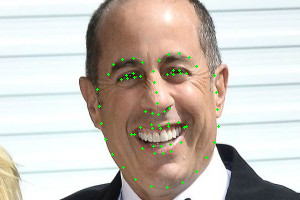

In [35]:
#let‘s try!
detect_landmarks(img6_bgr)

# 3. Face recognition

In [66]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 27 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=1d434980d616c9f1d932fd19bcdadb45139f11847a1d9bd2c9177d88804e15e1
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [67]:
import face_recognition

In [147]:
#load a sample picture 1 and learn how to recognize it
image_path_jerry = "/content/drive/MyDrive/ml-projects/5-celeb-faces/train/jerry_seinfeld/1.jpg"
jerry_image = face_recognition.load_image_file(image_path_jerry)
jerry_face_encoding = face_recognition.face_encodings(jerry_image)

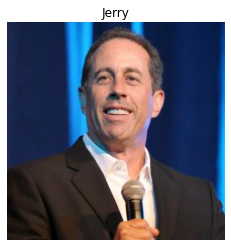

In [184]:
#display the images
plt.imshow(jerry_image)
plt.title("Jerry")
plt.axis("off");

In [185]:
#create variables with known face encodings and their names
known_face_encodings = jerry_face_encoding
jerry = "Jerry"

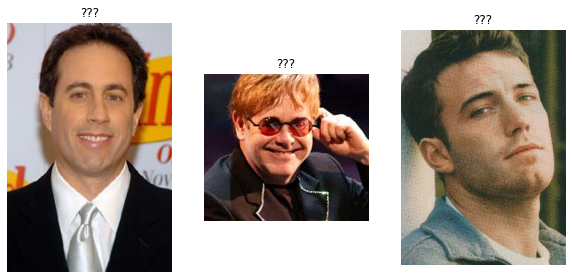

In [186]:
#load unknown pictures
img_jerry_path = "/content/drive/MyDrive/ml-projects/5-celeb-faces/train/jerry_seinfeld/8.jpg"
img_elton_path = "/content/drive/MyDrive/ml-projects/5-celeb-faces/train/elton_john/2.jpg"
img_ben_path = "/content/drive/MyDrive/ml-projects/5-celeb-faces/train/ben_afflek/1.jpg"

#jerry
img_jerry = dlib.load_rgb_image(img_jerry_path)
img_jerry_bgr = cv2.cvtColor(img_jerry, cv2.COLOR_RGB2BGR)

#elton
img_elton = dlib.load_rgb_image(img_elton_path)
img_elton_bgr = cv2.cvtColor(img_elton, cv2.COLOR_RGB2BGR)

#ben
img_ben = dlib.load_rgb_image(img_ben_path)
img_ben_bgr = cv2.cvtColor(img_ben, cv2.COLOR_RGB2BGR)

#display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
ax1.imshow(img_jerry)
ax1.set_title("???")
ax1.axis("off")
ax2.imshow(img_elton)
ax2.set_title("???")
ax2.axis("off")
ax3.imshow(img_ben)
ax3.set_title("???")
ax3.axis("off");

In [187]:
#find the faces and face encodings in the current picture
face_locations = face_recognition.face_locations(img_jerry_bgr)
face_encodings = face_recognition.face_encodings(img_jerry_bgr, face_locations)

#see if the face is a match for the known faces
for face_encoding in face_encodings:
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
  name = "Not Jerry"

  if True in matches:
    name = jerry

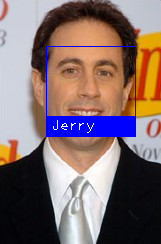

In [188]:
# Display the result
for face_location in face_locations:
  y0, x1, y1, x0 = face_location
  #draw a box around the face
  detected_img = cv2.rectangle(img_jerry_bgr, (x0, y0), (x1, y1), (255, 0, 0))

  #draw a label with a name below the face
  detected_img = cv2.rectangle(img_jerry_bgr, (x0, y1 -20), (x1, y1), (255, 0, 0), cv2.FILLED)
  font = cv2.FONT_HERSHEY_PLAIN
  detected_img = cv2.putText(img_jerry_bgr, name, (x0 + 6, y1 -6), font, 1.0, (255, 255, 255), 1)

  cv2_imshow(img_jerry_bgr)

In [189]:
#find the faces and face encodings in the current picture
face_locations = face_recognition.face_locations(img_elton_bgr)
face_encodings = face_recognition.face_encodings(img_elton_bgr, face_locations)

#see if the face is a match for the known faces
for face_encoding in face_encodings:
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
  name = "Not Jerry"

  if True in matches:
    name = jerry

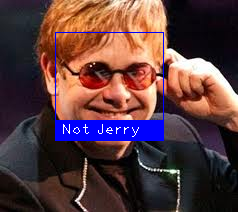

In [190]:
# Display the result
for face_location in face_locations:
  y0, x1, y1, x0 = face_location
  #draw a box around the face
  detected_img = cv2.rectangle(img_elton_bgr, (x0, y0), (x1, y1), (255, 0, 0))

  #draw a label with a name below the face
  detected_img = cv2.rectangle(img_elton_bgr, (x0, y1 -20), (x1, y1), (255, 0, 0), cv2.FILLED)
  font = cv2.FONT_HERSHEY_PLAIN
  detected_img = cv2.putText(img_elton_bgr, name, (x0 + 6, y1 -6), font, 1.0, (255, 255, 255), 1)

  cv2_imshow(img_elton_bgr)

In [191]:
#find the faces and face encodings in the current picture
face_locations = face_recognition.face_locations(img_ben_bgr)
face_encodings = face_recognition.face_encodings(img_ben_bgr, face_locations)

#see if the face is a match for the known faces
for face_encoding in face_encodings:
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
  name = "Not Jerry"

  if True in matches:
    name = jerry

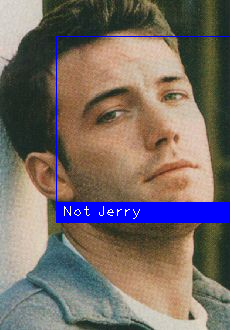

In [192]:
# Display the result
for face_location in face_locations:
  y0, x1, y1, x0 = face_location
  #draw a box around the face
  detected_img = cv2.rectangle(img_ben_bgr, (x0, y0), (x1, y1), (255, 0, 0))

  #draw a label with a name below the face
  detected_img = cv2.rectangle(img_ben_bgr, (x0, y1 -20), (x1, y1), (255, 0, 0), cv2.FILLED)
  font = cv2.FONT_HERSHEY_PLAIN
  detected_img = cv2.putText(img_ben_bgr, name, (x0 + 6, y1 -6), font, 1.0, (255, 255, 255), 1)

  cv2_imshow(img_ben_bgr)

#4. Object detection